# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import (KBinsDiscretizer, OneHotEncoder, StandardScaler)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (CountVectorizer, TfidfTransformer, TfidfVectorizer)
from sklearn.compose import ColumnTransformer

In [2]:
# Algumas configurações para o matplotlib.
# %matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
# Verificando espaços em regions
regions_spc =  countries['Region'].unique()
sorted(list(regions_spc))

['ASIA (EX. NEAR EAST)         ',
 'BALTICS                            ',
 'C.W. OF IND. STATES ',
 'EASTERN EUROPE                     ',
 'LATIN AMER. & CARIB    ',
 'NEAR EAST                          ',
 'NORTHERN AFRICA                    ',
 'NORTHERN AMERICA                   ',
 'OCEANIA                            ',
 'SUB-SAHARAN AFRICA                 ',
 'WESTERN EUROPE                     ']

In [6]:
countries_spc =  countries['Country'].unique()
sorted(list(countries_spc))

['Afghanistan ',
 'Albania ',
 'Algeria ',
 'American Samoa ',
 'Andorra ',
 'Angola ',
 'Anguilla ',
 'Antigua & Barbuda ',
 'Argentina ',
 'Armenia ',
 'Aruba ',
 'Australia ',
 'Austria ',
 'Azerbaijan ',
 'Bahamas, The ',
 'Bahrain ',
 'Bangladesh ',
 'Barbados ',
 'Belarus ',
 'Belgium ',
 'Belize ',
 'Benin ',
 'Bermuda ',
 'Bhutan ',
 'Bolivia ',
 'Bosnia & Herzegovina ',
 'Botswana ',
 'Brazil ',
 'British Virgin Is. ',
 'Brunei ',
 'Bulgaria ',
 'Burkina Faso ',
 'Burma ',
 'Burundi ',
 'Cambodia ',
 'Cameroon ',
 'Canada ',
 'Cape Verde ',
 'Cayman Islands ',
 'Central African Rep. ',
 'Chad ',
 'Chile ',
 'China ',
 'Colombia ',
 'Comoros ',
 'Congo, Dem. Rep. ',
 'Congo, Repub. of the ',
 'Cook Islands ',
 'Costa Rica ',
 "Cote d'Ivoire ",
 'Croatia ',
 'Cuba ',
 'Cyprus ',
 'Czech Republic ',
 'Denmark ',
 'Djibouti ',
 'Dominica ',
 'Dominican Republic ',
 'East Timor ',
 'Ecuador ',
 'Egypt ',
 'El Salvador ',
 'Equatorial Guinea ',
 'Eritrea ',
 'Estonia ',
 'Ethiopia '

In [7]:
# Corrigindo espaços em Country e Region
countries["Country"] = countries["Country"].str.strip()
countries["Region"] = countries["Region"].str.strip()


In [8]:
# verificando correções de espaços
regions_spc =  countries['Region'].unique()
sorted(list(regions_spc))

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

In [9]:
countries_spc =  countries['Country'].unique()
sorted(list(countries_spc))

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia & Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Is.',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Repub. of the',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guian

In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [11]:
columns = ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate', 'Birthrate',  'Deathrate', 'Agriculture', 'Industry', 'Service'] 

countries[columns] = countries[columns].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [12]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

In [13]:
countries.head(2)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579


In [14]:
countries.isna().sum() 

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [15]:
def q1():
    regions_final = sorted(list(regions_spc))
    return regions_final

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [16]:
def q2():
    percentil = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    X = countries[['Pop_density']]
    y = countries.Country
    percentil_90 = percentil.fit_transform(X,y) >= 9.0
    percentil_final = int(np.sum(percentil_90))
    return percentil_final

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [17]:
dummies_encoded = pd.get_dummies(countries[['Region', 'Climate']].fillna('NaN'))
dummies_final = int(dummies_encoded.shape[1])
dummies_final

18

In [18]:
def q3():    
    return dummies_final

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [19]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [20]:
# Criando um novo DF com as variáveis numéricas
numericas= list(countries.select_dtypes(include='number').columns)
df_numericas = countries[numericas]

In [21]:
# Pipeline para substituir nulos pela média e padronizar valores
pipeline_num = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                               ('scaler', StandardScaler())])
pipeline_var_num = pipeline_num.fit_transform(df_numericas)
pipeline_median = pd.DataFrame(pipeline_var_num, columns=df_numericas.columns)

In [22]:
# Pipeline no test_country
pipeline_test_country = pipeline_num.transform([test_country[2:]])
pipeline_position = pd.DataFrame(pipeline_test_country, columns=df_numericas.columns)
arable_value = pipeline_position['Arable']
pipeline_final = float(arable_value.round(3))
pipeline_final

-1.047

In [23]:
def q4():
    return pipeline_final

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

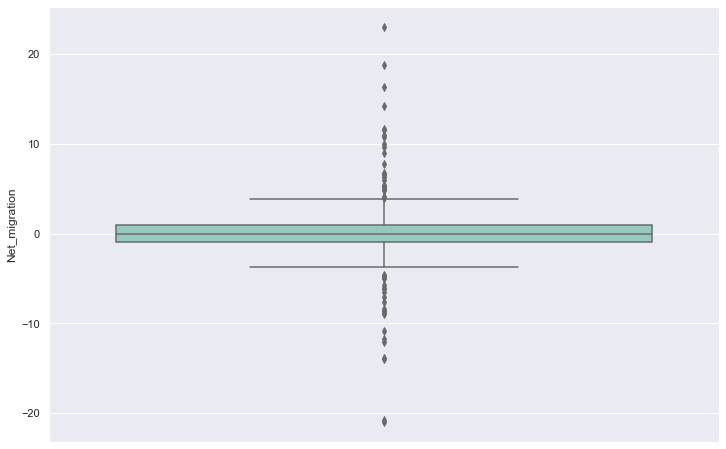

In [24]:
# Descubra o número de outliers da variável Net_migration segundo o método do boxplot
net_migration = countries['Net_migration'].dropna()
sns.boxplot(net_migration, palette='Set3',  orient='vertical');

In [25]:
# Encontrar a faixa normal para encontrar o outliers

quantil1 = net_migration.quantile(0.25)
quantil3 = net_migration.quantile(0.75)
iqr = quantil3 - quantil1

non_outlier_iqr = [quantil1 - 1.5 * iqr, quantil3 + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_iqr}")

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [26]:
# Encontrando os outliers
outliers_abaixo = net_migration[(net_migration < non_outlier_iqr[0])]
outliers_acima = net_migration[(net_migration > non_outlier_iqr[1])]
outliers_iqr = (int(len(outliers_abaixo)), int(len(outliers_acima)), False)
outliers_iqr

(24, 26, False)

In [27]:
def q5():
    return outliers_iqr

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [28]:
# Analisando o dataset fetch_20newsgroups
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [29]:
# Contagem da palavra phone
countvectorizer = CountVectorizer()
vectorizer_count = countvectorizer.fit_transform(newsgroup.data)
vectorizer_words = countvectorizer.vocabulary_
phone = int(vectorizer_count[:, vectorizer_words['phone']].sum())
phone

213

In [30]:
def q6():
    return phone

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [31]:
# TF-IDF da palavra phone
tfidf = TfidfVectorizer().fit(newsgroup.data)
tfidf_count = tfidf.transform(newsgroup.data)
words_tfidf = tfidf.vocabulary_
tfidf_phone = float(tfidf_count[:, words_tfidf['phone']].sum().round(3))
tfidf_phone

8.888

In [32]:
def q7():
    return tfidf_phone